In [3]:
from dask_jobqueue import SLURMCluster

cluster = SLURMCluster(
    job_name="TestJob",          # --job-name
    cores=10,                     # Number of cores per task (adjust if needed)
    processes=5,                 # One process per task
    memory="40GB",               # --mem
    walltime="00:15:00",         # --time
    queue="short",               # --partition
    log_directory=".",           # Logs will be saved to the current directory
)



In [4]:


from dask.distributed import Client

cluster.scale(jobs=10)
client = Client(cluster)



In [5]:
client

Connection method: Cluster object,Cluster type: dask_jobqueue.SLURMCluster
Dashboard: http://10.42.239.61:8787/status,
Dashboard: http://10.42.239.61:8787/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://10.42.239.61:40259,Workers: 0
Dashboard: http://10.42.239.61:8787/status,Total threads: 0
Started: Just now,Total memory: 0 B


In [6]:
import xarray as xr
import numpy as np


In [7]:
import glob 

In [10]:
all_files = glob.glob('/home1/nalex2023/Datasets/interpsonde_manus/'+'*.nc')

all_dset = xr.open_mfdataset(all_files)

In [11]:
all_dset

<xarray.Dataset> Size: 905MB
Dimensions:   (time: 113520, height: 332)
Coordinates:
  * height    (height) float32 1kB 0.004 0.024 0.044 0.064 ... 39.5 40.0 40.5
  * time      (time) datetime64[ns] 908kB 2001-04-05 ... 2014-07-09T23:00:00
Data variables:
    bar_pres  (time, height) float32 151MB dask.array<chunksize=(4776, 332), meta=np.ndarray>
    temp      (time, height) float32 151MB dask.array<chunksize=(4776, 332), meta=np.ndarray>
    dp        (time, height) float32 151MB dask.array<chunksize=(4776, 332), meta=np.ndarray>
    rh        (time, height) float32 151MB dask.array<chunksize=(4776, 332), meta=np.ndarray>
    u_wind    (time, height) float32 151MB dask.array<chunksize=(4776, 332), meta=np.ndarray>
    v_wind    (time, height) float32 151MB dask.array<chunksize=(4776, 332), meta=np.ndarray>
Attributes: (12/13)
    command_line:          idl -D 0 -R -n interpolatedsonde -s twp -f C1 -b 2...
    Conventions:           ARM-1.1
    process_version:       vap-interpolatedsonde-6.6-0.el6
    input_datastreams:     twpgriddedsondeC1.c0 : 2.2 : 20010403.000030-20010...
    dod_version:           interpolatedsonde-c1-4.0
    site_id:               twp
    ...                    ...
    facility_id:           C1
    data_level:            c1
    location_description:  Tropical Western Pacific (TWP), Manus Island, Papu...
    datastream:            twpinterpolatedsondeC1.c1
    doi:                   10.5439/1095316
    history:               created by user ttoto on machine chalk at 2016-05-...

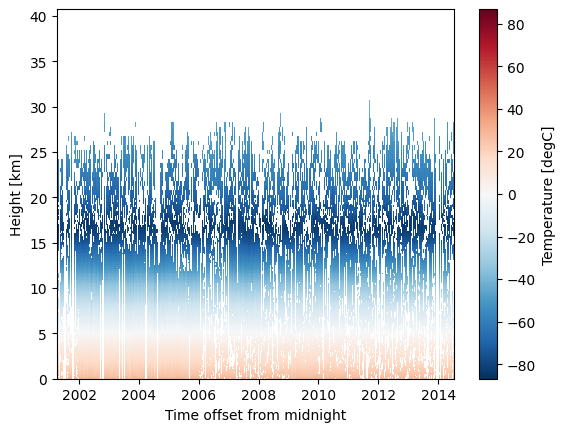

In [13]:
all_dset.temp.plot(x='time')